# Session 16: Principal Component Analysis

------------------------------------------------------
*ATDST, 2017-2018*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

Principal component analysis, or PCA, is a technique that is widely used for applications such as dimensionality reduction, lossy data compression, feature extraction, and data visualization. The main idea behind PCA is to **find a lower-dimensional space** that is able to explain our data, capturing the structure of the data with a simple **linear projection**.

Recommended bibliography:
- Chapter 12 of Pattern Recognition and Machine Learning, Christopher Bishop, 2006
- Chapter 15 of [Bayesian Reasoning and Machine Learning](http://web4.cs.ucl.ac.uk/staff/D.Barber/textbook/090310.pdf), David Barber, 2010

The following notes are mainly based on Bishop's book

## Derivation of PCA using the minimum-error formulation

Consider a data set of $D$-dimensional real observations $\{\mathbf{x}^{(i)}\}$, $i=1,\ldots,N$. Our goal is to project the data onto a space with dimensionality $M<D$, while 
**minimizing the norm-2 error in the reconstruction of the $D$-dimensional vector**. 

Consider a complete orthonormal set of $D$-dimensional basis vectors $\{\mathbf{u}_d\}$, $d=1,\ldots,D$:

\begin{align}
&||\mathbf{u}_d||_2 = 1\\ \\
&\mathbf{u}^T_d\mathbf{u}_j=0~~ \text{for } d\neq j
\end{align}

Because it is a complete basis, any vector $\mathbf{x}^{(i)}\in\mathbb{R}^D$ can be expressed as follows:
\begin{align}
\mathbf{x}^{(i)} =\sum_{d=1}^D \alpha_d^i \mathbf{u}_d,
\end{align}
where $\alpha_d^i \mathbf{u}_d$ is the orthogonal proyection of $\mathbf{x}^{(i)}$ into $\mathbf{u}_d$:
\begin{align}
\text{P}_{\mathbf{u}_d}(\mathbf{x}^{(i)})=\alpha_d^i=\frac{(\mathbf{x}^{(i)})^T \mathbf{u}_d}{||\mathbf{u}_d||}=(\mathbf{x}^{(i)})^T \mathbf{u}_d
\end{align}

### $M$-dimensional projection

The $M$-dimensional linear subspace can be represented, without loss of generality, by the first $M$ of the basis vectors, and so we approximate each data point $\mathbf{x}^{(i)}$ by 

\begin{align}
\tilde{\mathbf{x}}^{(i)} = \sum_{i=1}^M z_d^i \mathbf{u}_d + \sum_{d=M+1}^{D} b_d \mathbf{u}_d,
\end{align}
where

- $\{z_d^i\}$ **depend on the particular data point**
- $\{b_d\}$ **are the same for all data points**

We will optimize $\{\mathbf{u}_d\}$, $\{z_d^i\}$, and $\{b_d\}$ to minimize the squared distance between the original data point and its approximation:
\begin{align}
J = \frac{1}{N}\sum_{i=1}^N || \mathbf{x}^{(i)} - \tilde{\mathbf{x}}^{(i)}|| ^2
\end{align}

#### Minimization w.r.t. $\{z_d^i\}$

It is easy to show that, for $d=1,\ldots,M$,

\begin{align}
\frac{\partial J}{\partial z_d^i}=0 \Rightarrow z_d^i = (\mathbf{x}^{(i)})^T \mathbf{u}_d,
\end{align}
hence $z_d^i$ is the orthogonal proyection of $\mathbf{x}^{(i)}$ into $\mathbf{u}_d$.

#### Minimization w.r.t. $\{b^d\}$

Similarly, for $d=1,\ldots,M$,

\begin{align}
\frac{\partial J}{\partial b_d}=0 \Rightarrow b_d = (\overline{\mathbf{x}})^T \mathbf{u}_d,
\end{align}
where 

\begin{align}
\overline{\mathbf{x}} = \frac{1}{N} \sum_{i=1}^{n} \mathbf{x}^{(i)}
\end{align}


hence $z_d^i$ is the orthogonal proyection of $\mathbf{x}^{(i)}$ into $\mathbf{u}_d$.

#### Simplified cost function 

If we substitute $z_d^i$, and $b_d$ into the expression of $\tilde{\mathbf{x}}^{(i)}$ and we make use of the general expression 

\begin{align}
\mathbf{x}^{(i)} =\sum_{d=1}^D \left((\mathbf{x}^{(i)})^T \mathbf{u}_d\right) \mathbf{u}_d
\end{align}
we get

\begin{align}
\mathbf{x}^{(i)} -\tilde{\mathbf{x}}^{(i)} = \sum_{d=M+1}^D \left((\mathbf{x}^{(i)}-\overline{\mathbf{x}})^T \mathbf{u}_d\right)\mathbf{u}_d
\end{align}

**Therefore, the displacement between $\mathbf{x}^{(i)}$ and $ \tilde{\mathbf{x}}^{(i)}$ lies in the space orthogonal to the projected subspace we are looking for. PCA looks for the projected subspace for which we minimize the average displacement**:

\begin{align}
J = \frac{1}{N}\sum_{i=1}^N \sum_{d=M+1}^D \left((\mathbf{x}^{(i)})^T\mathbf{u}_d-\overline{\mathbf{x}}^T\mathbf{u}_d\right)^2=\sum_{d=M+1}^D\mathbf{u}_d^T ~\mathbf{S}~ \mathbf{u}_d,
\end{align}

where $\mathbf{S}$ is the **empirical covariance matrix**

\begin{align}
\mathbf{S} = \frac{1}{N} \sum_{i=1}^N (\mathbf{x}^{(i)}-\overline{\mathbf{x}})(\mathbf{x}^{(i)}-\overline{\mathbf{x}})^T
\end{align}


#### Constrained optimization

We need to enforce that $\{\mathbf{u}_d\}$ is an orthonormal basis. We use **Lagrange multipliers**:

\begin{align}
\arg \min_{\{\mathbf{u}_d\}} \sum_{d=M+1}^D\mathbf{u}_d^T ~\mathbf{S}~ \mathbf{u}_d + \sum_{d=M+1}^{D} \lambda_d (1-\mathbf{u}_d^T\mathbf{u}_d)
\end{align}

The solution is obtained by choosing $\{\mathbf{u}_d\}$ to be **eigenvectors of $\mathbf{S}$**:

\begin{align}
\mathbf{S}~ \mathbf{u}_d = \lambda_d \mathbf{u}_d
\end{align} 

and the corresponding value of the distortion measure is then given by

\begin{align}
J = \sum_{d=M+1}^D \lambda_d
\end{align}

We therefore obtain the minimum error by **selecting the eigenvectors of $\mathbf{S}$** that have the largest **eigenvalues**

The computational cost of computing the full eigenvector decomposition for a matrix of size $D \times D$ is $\mathcal{O}(D^3)$. If we plan to project our data onto the first $M$ principal components, then we only need to find the first $M$ eigenvalues and eigenvectors. This can be done with more efficient techniques, such as the [*power method*](http://ergodic.ugr.es/cphys/LECCIONES/FORTRAN/power_method.pdf) that scales like $\mathcal{O}(MD^2)$.

## Dimensionality reduction with PCA: summary

1) Given the data set $\{\mathbf{x}^{(i)}\}$, compute the **empirical covariance matrix**

\begin{align}
\mathbf{S} = \frac{1}{N} \sum_{i=1}^N (\mathbf{x}^{(i)}-\overline{\mathbf{x}})(\mathbf{x}^{(i)}-\overline{\mathbf{x}})^T
\end{align}

2) Compute the set of $M$ dominant eigenvectors of $\mathbf{S}$: $\mathbf{U}_{D\times M}$

3) Each datapoint is projected into the $M$-dimensional space defined by the basis $\mathbf{U}$:

\begin{align}
\mathbf{z}^{(i)} = \mathbf{U}^T \mathbf{x}^{(i)}
\end{align}

4) **IF YOUR DATA IS CENTERED**, I.E., $\overline{\mathbf{x}}=\mathbf{0}$, then you can approximatelhy reconstruct each data point back into the original subspace as 

\begin{align}
\tilde{\mathbf{x}}^{(i)}  =  \mathbf{U} \mathbf{z}^{(i)}
\end{align}

**OTHERWISE**, you need the full eigenvector matrix of $\mathbf{S}$, i.e., $[\mathbf{U}, \mathbf{U}']$, where $\mathbf{U}'$ is of size $D\times(D-M)$ and then

\begin{align}
\tilde{\mathbf{x}}^{(i)}  =  \mathbf{U} \mathbf{z}^{(i)} +  \mathbf{U}' \overline{\mathbf{x}}
\end{align}

Hence, it is recommended to first center the data to apply PCA

# Example 1: PCA for a database of cars

[** Example borrowed from Kevin Murphy's book material**](https://github.com/probml)

We use to PCA to visualize in a $2$-dimensional space a dataset of D = 11 variables and N = 387 cases describing various aspects of cars, such as the engine size, the number of cylinders, the miles per gallon (MPG), the price, etc.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
import pandas as pd

In [5]:
car_data=pd.read_excel('./Car-DataBase.xlsx')

In [6]:
#Lets visualize the data and list the entries for each one
l=list(car_data)
print(l)

list_cars=list(car_data[l[0]])

car_data[:5]

['Type', 'MPG.city', 'MPG.highway', 'AirBags', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Weight']


,Type,MPG.city,MPG.highway,AirBags,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Passengers,Length,Wheelbase,Width,Turn.circle,Weight
0,Acura Integra,15.9,25,31,4,1.8,140,6300,2890,13.2,5,177,102,68,37
1,Acura Legend,33.9,18,25,6,3.2,200,5500,2335,18.0,5,195,115,71,38
2,Audi 90,29.1,20,26,6,2.8,172,5500,2280,16.9,5,180,102,67,37
3,Audi 100,37.7,19,26,6,2.8,172,5500,2535,21.1,6,193,106,70,37
4,BMW 535i,30.0,22,30,4,3.5,208,5700,2545,21.1,4,186,109,69,39


### Data normalization


In [12]:
l=l[1:]  #We remove the first column

Data=np.array(car_data[l])

print(Data.shape)

Data-=np.mean(Data,axis=0)
Data/=np.std(Data,axis=0)

(92, 12)


### PCA 2-dimensional representation of the data

In [13]:
pca = decomposition.PCA(n_components=2)
pca.fit(Data)
Data2 = pca.transform(Data)

<IPython.core.display.Javascript object>


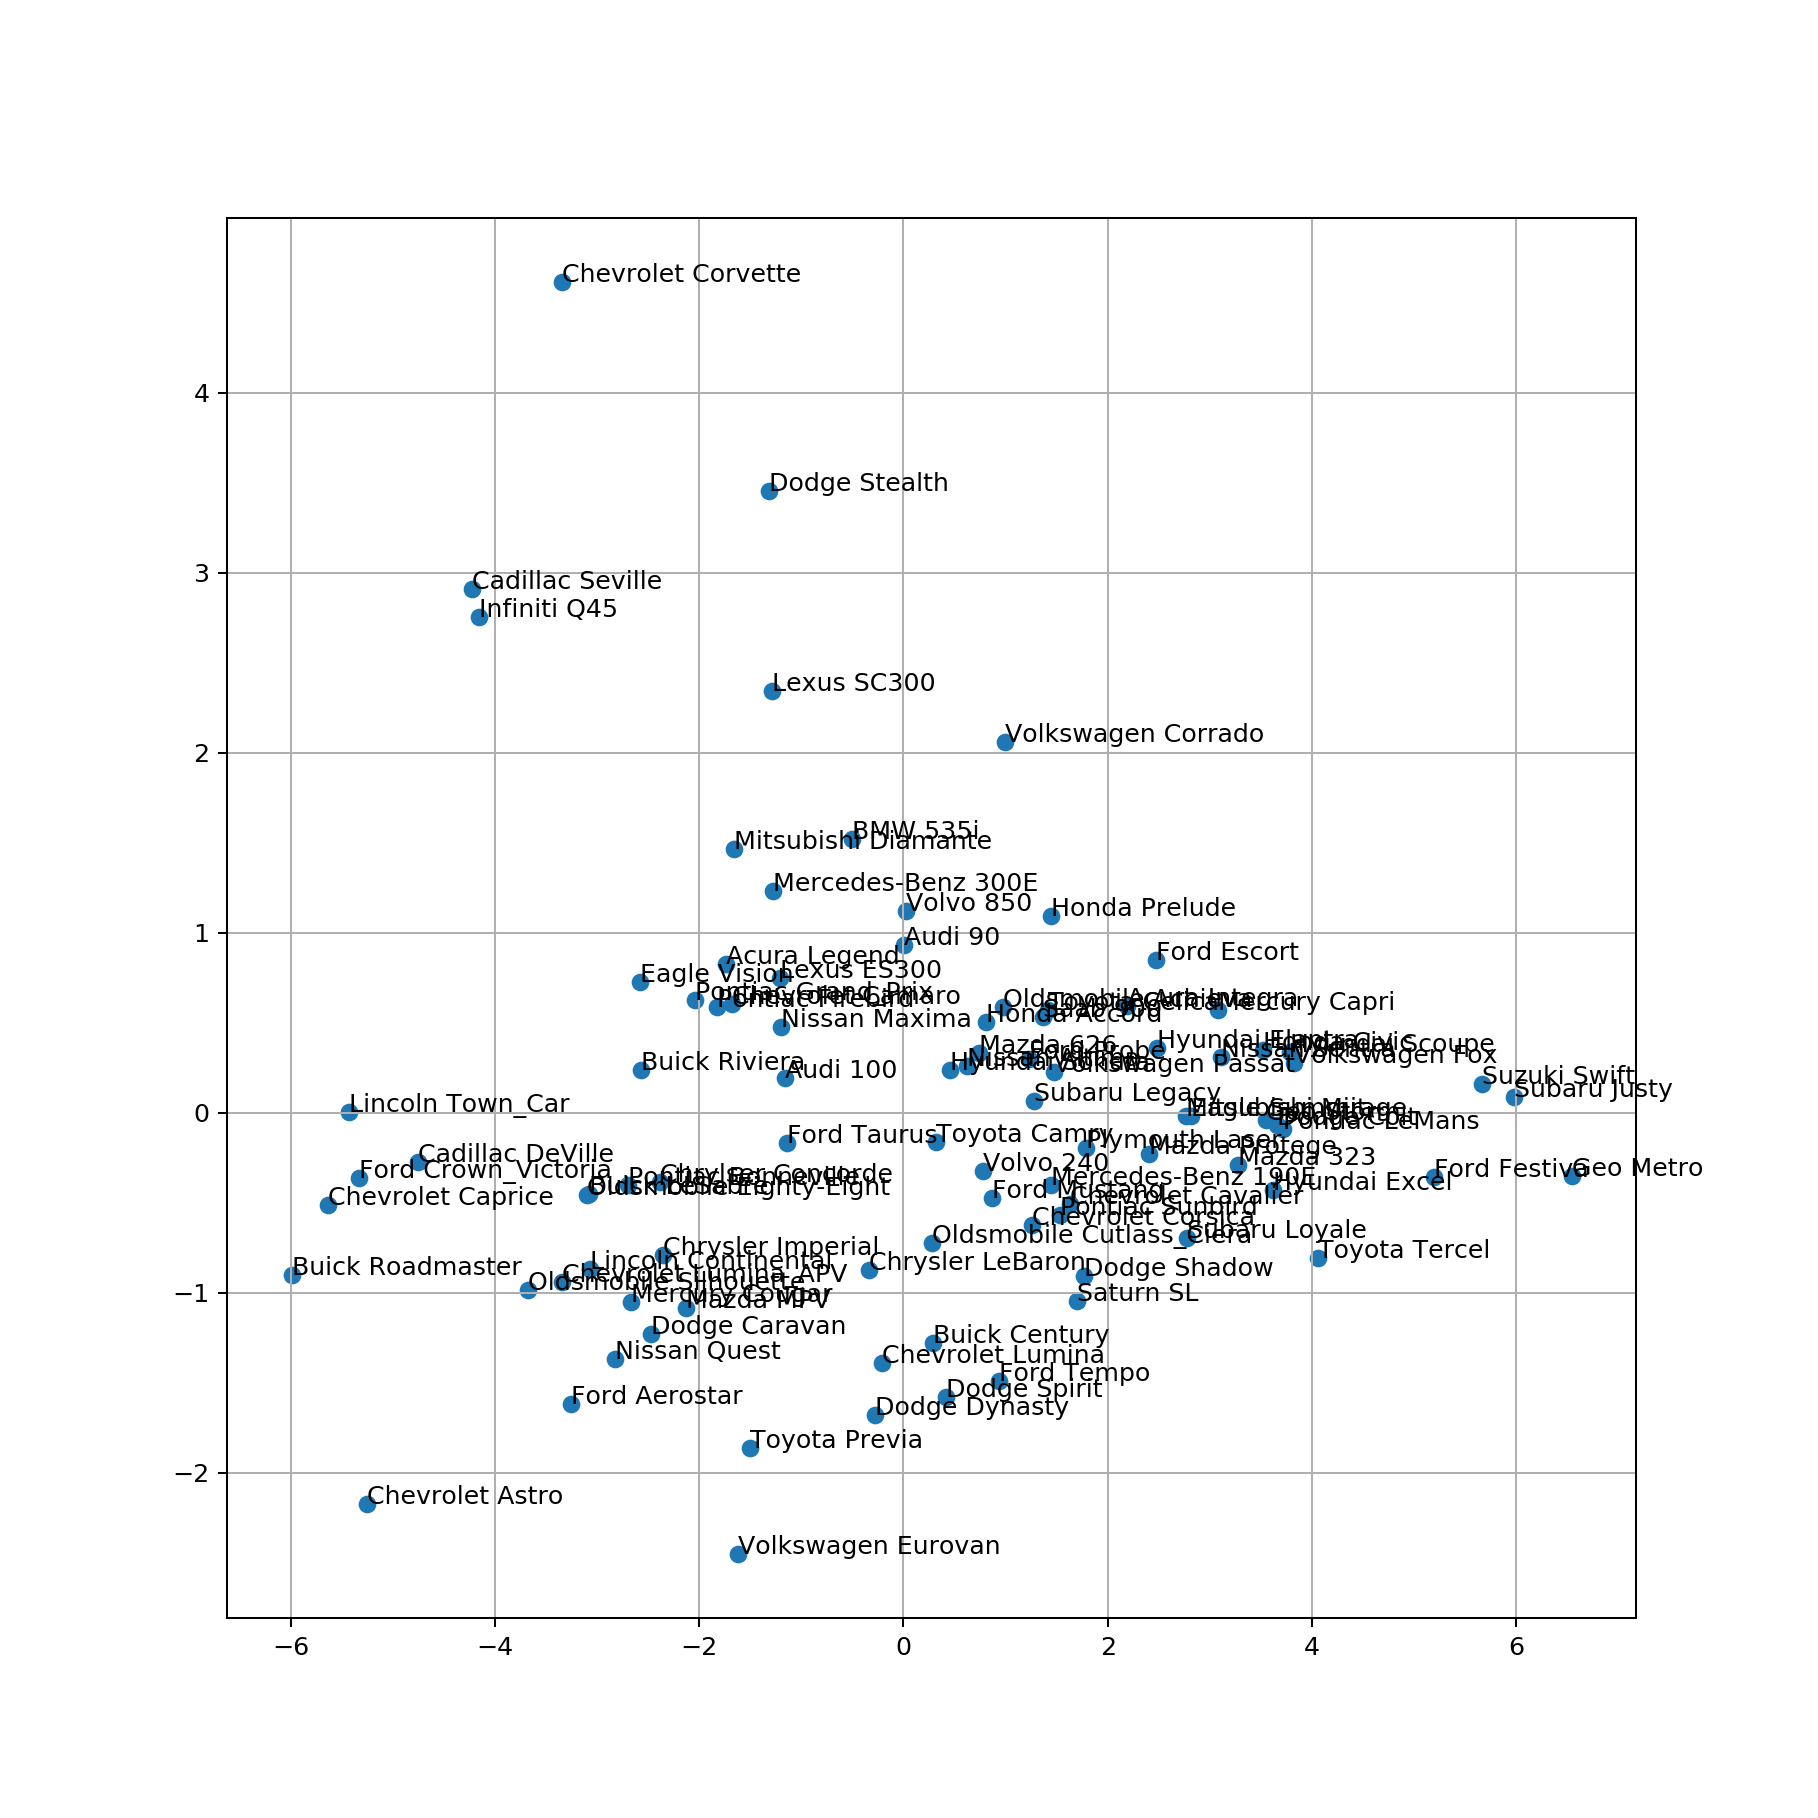

In [14]:
%matplotlib notebook
#%matplotlib inline 

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.scatter(Data2[:,0], Data2[:,1])

for i,car in enumerate(list_cars):
    plt.annotate(car,(Data2[i,0], Data2[i,1]))
    
plt.grid()

**Try to give an interpretation about the meaning of the two principal direction**

# Example 2: Hand-written digits

Check the following [**example**](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) in and try to reproduce it!